In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.special import jn_zeros
from scipy.special import gamma
from scipy.special import factorial
from scipy.optimize import fsolve
from scipy.optimize import brentq

In [85]:
h = 0.001
r = 10000
x = np.array([0,1,0])
T_max = 50

def f(t,X,r):
    x = X[0]
    y = X[1]
    z = X[2]
    dx = -3*(x-y)
    dy = -x*z+r*x-y
    dz = x*y-z
    return(np.array([dx,dy,dz]))

def fourth_order_RK(t_n,x_n,f,h,r):
    k_1 = f(t_n,x_n,r)
    k_2 = f(t_n+h/2,x_n+k_1*h/2,r)
    k_3 = f(t_n+h/2,x_n+k_2*h/2,r)
    k_4 = f(t_n+h,x_n+h*k_3,r)
    return x_n + h*((k_1+k_4)/6 +(k_2+k_3)/3)


def run_solvers(x ,h,r,T_max):
    t = 0
    n = int(T_max/h)
    Ts = np.zeros((n,3))
    FORK = np.zeros((n,3))
    FORK[0:] = x
    for i in range(n):
        i+1
        FORK[i] = fourth_order_RK(t,FORK[i-1],f,h,r)
        Ts[i] = t
        t += h
    return( Ts, FORK )

Ts, Xs = run_solvers(x,h,r,T_max)

64.88840222793573


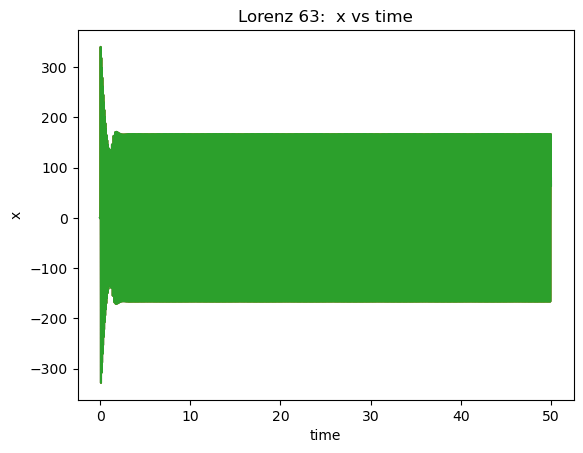

-1942.8775937802488


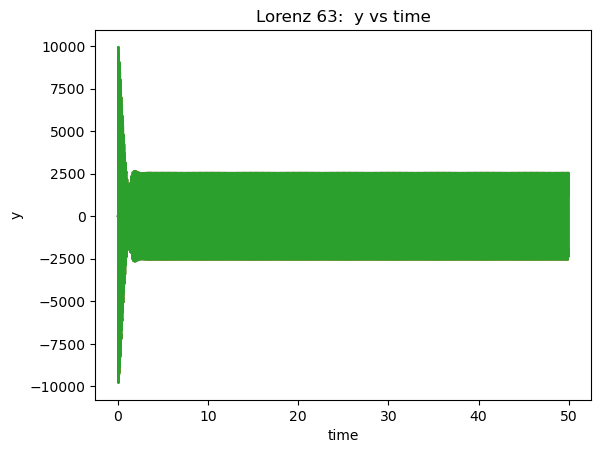

8633.474531437056


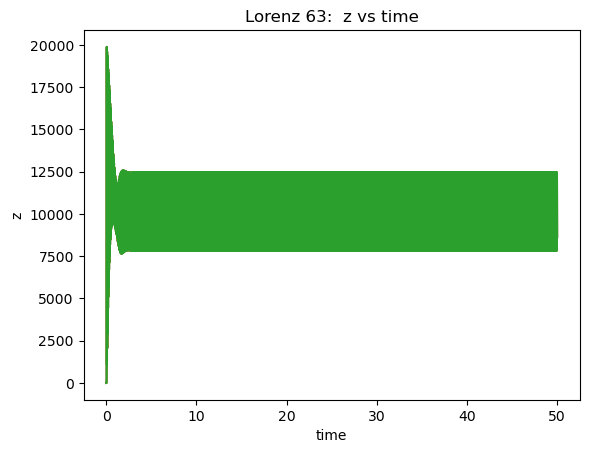

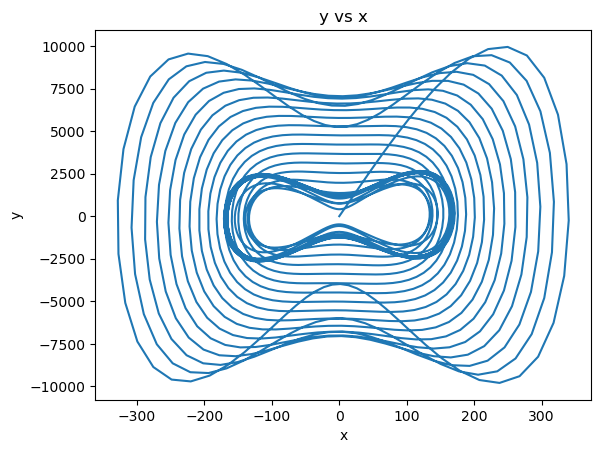

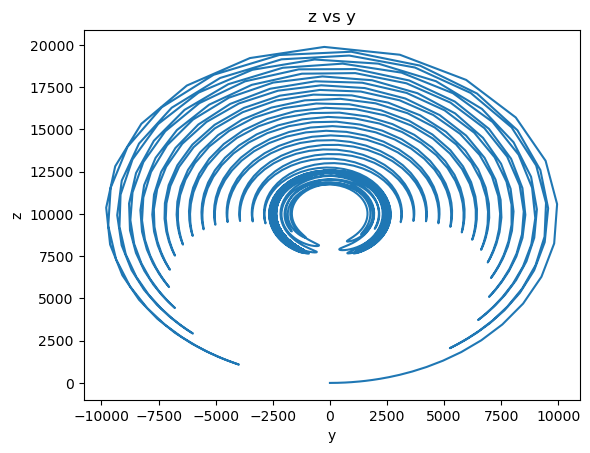

Text(0.5, 0.92, 'Lorenz 63: 3D plot')

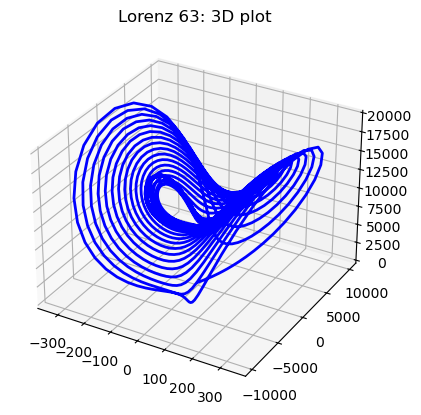

In [86]:


def plot_axis(axis,  Ts, Xs):
    #print(Xs.shape)
    #fig, ax = plt.subplots()
    plt.plot(Ts,Xs , label=f'Lorenz 63: {axis}')
    #legend = plt.legend(loc = 'upper left')#loc='upper center', shadow=True, fontsize='x-large')
    # Put a nicer background color on the legend.
    #legend.get_frame().set_facecolor('C0')
    #plt.title(f"{axis} vs Time")
    plt.title(f"Lorenz 63:  {axis} vs time")
    plt.xlabel("time")
    plt.ylabel(axis)
    plt.show()

def plotvs(Xs,axis,i):
    plt.plot(Xs[:,i],Xs[:,i+1] , label=f'Lorenz 63: {axis[i+1]} vs {axis[i]}')
    plt.title(f"{axis[i+1]} vs {axis[i]}")
    plt.xlabel(f"{axis[i]}")
    plt.ylabel(f"{axis[i+1]}")
    plt.show()

axis =["x","y","z"]

for i in range(3):
    print(Xs[-1,i])
    plot_axis(axis[i], Ts, Xs[:,i])
for i in range(2):
    plotvs(Xs,axis,i)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3. Plot the 3D line
ax.plot(Xs[:,0], Xs[:,1], Xs[:,2], color='blue', linewidth=2)
plt.title(f"Lorenz 63: 3D plot")
